# Dust Attenuation Curves

We implement a whole suite of different attenuation curves in synthesizer, including the following:

- ``PowerLaw``: A power-law attenuation curve.
- ``Calzetti2000``: The [Calzetti (Calzetti et al. 2000)](https://ui.adsabs.harvard.edu/abs/2000ApJ...533..682C/abstract) attenuation curve (with an optional UV bump from [Noll et al. 2009](https://ui.adsabs.harvard.edu/abs/2009A%26A...507.1793N/abstract)).
- ``MWN18``: A Milky Way attenuation curve, defined in [Narayanan et al. 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...869...70N/abstract).
- ``GrainsWD01``: A dust grain attenuation curve from [Weingarter and Draine 2001](https://ui.adsabs.harvard.edu/abs/2001ApJ...548..296W/abstract) with models for the Milky Way, LMC, and SMC (and more defined in WD01).
- ``ParametricLi08``: A parametric and empirically derived attenuation curve implemented in [Li et al. 2008](https://ui.adsabs.harvard.edu/abs/2008arXiv0808.4123L/abstract), including parameters from [Markov et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A%26A...679A..12M/abstract) and [Markov et al. 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240205996M/abstract).

These attenuation curves can be instantiated directly, or attached to an ``EmissionModel`` to be used in the generation of complex spectra from a galaxy or galaxy component.

Each model has unique arguments required at instantiation, but all have the same base methods, such as ``get_transmission`` (which requires an optical depth (``tau_v``) and a wavelength array). Below, we show how to instantiate each of these models and plot their transmission and attenuation curves.

We first define a wavelength array up front:

In [1]:
import numpy as np
from unyt import Angstrom

lams = np.logspace(3.1, 4, 1000) * Angstrom

## PowerLaw

A ``PowerLaw`` only requires a slope to be defined.
We can then use the in-built methods, e.g. ``get_transmission``, to return the transmission over our wavelength array values.

In [2]:
from synthesizer.emission_models.attenuation import PowerLaw

power_law = PowerLaw(-1.0)

pl_trans = power_law.get_transmission(0.33, lams)

Below we plot the transmission and attenuation curves.

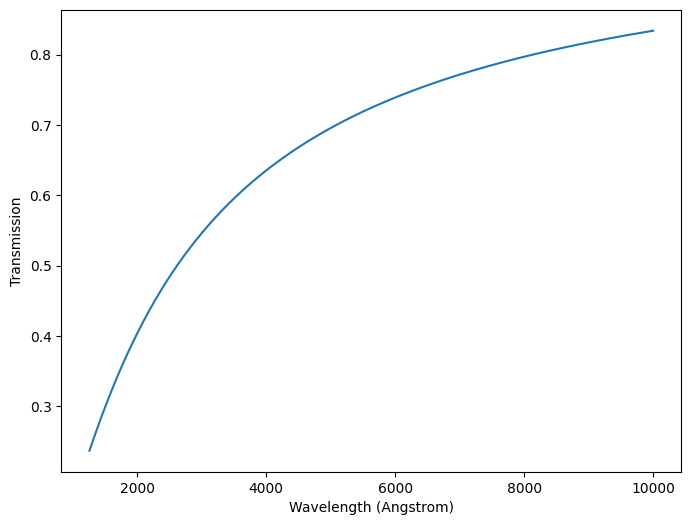

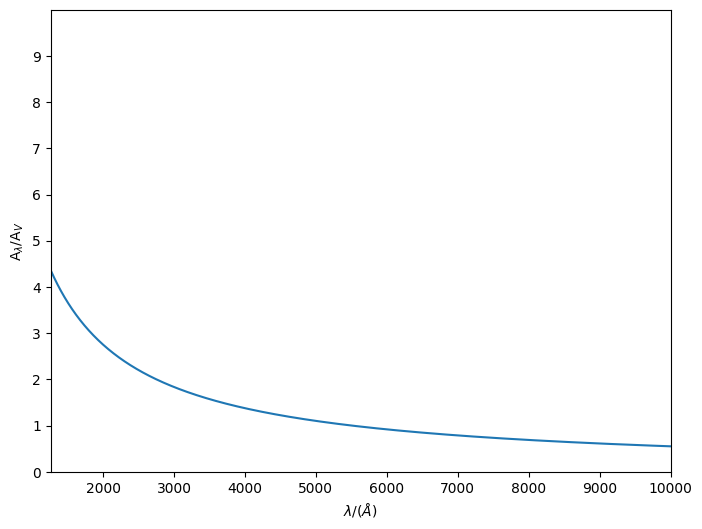

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$\\lambda/(\\AA)$', ylabel='A$_{\\lambda}/$A$_{V}$'>)

In [3]:
power_law.plot_transmission(0.33, lams, show=True)
power_law.plot_attenuation(lams, show=True)

## Calzetti2000

The ``Calzetti2000`` model requires a slope (``slope``), central wavelength of the UV bump (``cent_lam``), amplitude of the UV bump (``ampl``), and the FWHM of the UV bump (``gamma``). These default to 0.0, 0.2175 microns, 0, and 0.035, respectively. We plot the transmission curve both with the defaults and a non-zero bump amplitude.

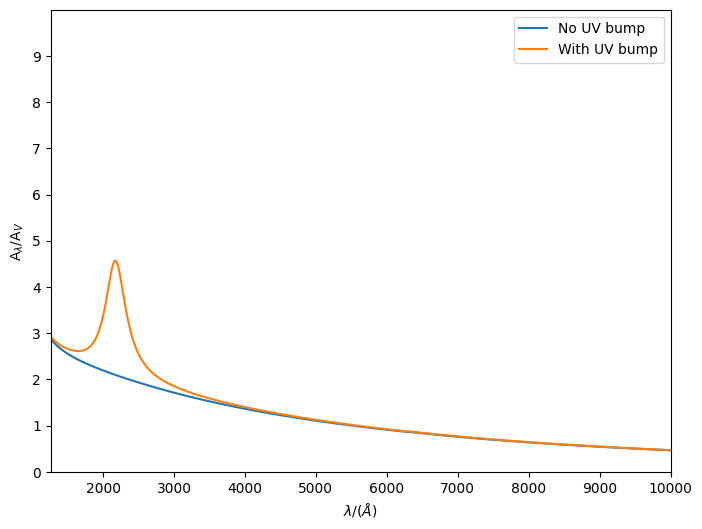

In [4]:
from synthesizer.emission_models.attenuation import Calzetti2000

no_bump = Calzetti2000()
with_bump = Calzetti2000(ampl=10.0)

fig, ax = no_bump.plot_attenuation(lams, show=False, label="No UV bump")
_, _ = with_bump.plot_attenuation(
    lams, fig=fig, ax=ax, show=True, label="With UV bump"
)

## MWN18

The ``MWN18`` model loads a data file included with synthesizer; as such, it requires no arguments.

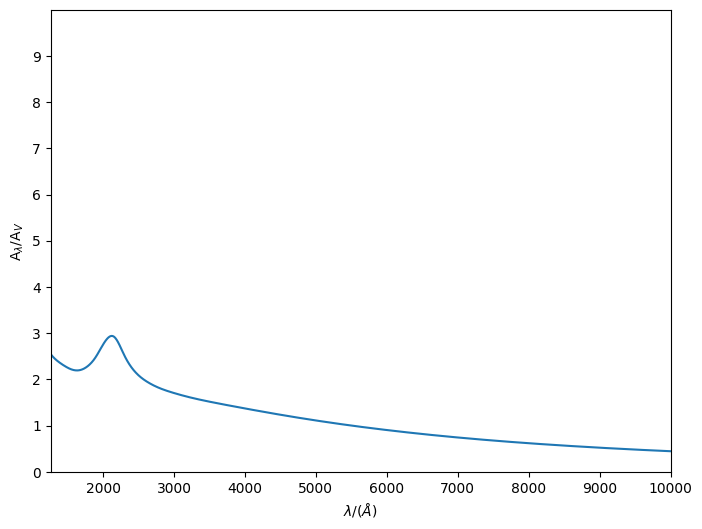

In [5]:
from synthesizer.emission_models.attenuation import MWN18

mwn18 = MWN18()

_, _ = mwn18.plot_attenuation(lams, show=True)

## GrainsWD01

``GrainsWD01`` requires the model to be defined (either ``'MW'``, ``'LMC'``, or ``'SMC'``), and uses the [dust_extinction module](https://dust-extinction.readthedocs.io/en/latest/#) to load the appropriate model.

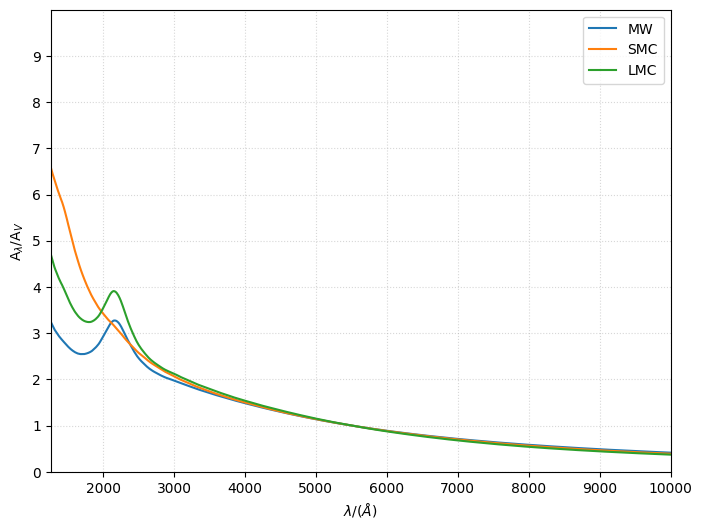

In [6]:
from synthesizer.emission_models.attenuation import GrainsWD01

mw = GrainsWD01("MW")
smc = GrainsWD01("SMC")
lmc = GrainsWD01("LMC")

fig, ax = mw.plot_attenuation(lams, show=False, label="MW")
_, _ = smc.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="SMC")
_, _ = lmc.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="LMC")
ax.grid(ls="dotted", alpha=0.5)

## ParametricLi08

The ``ParametricLi08`` model requires the UV slope (``UV_slope``, default 1.0), the optical to Near Infrared slope (``OPT_NIR_slope``, default 1.0), the Far UV slope (``FUV_slope``, default 1.0), and a dimensionless parameter between 0 and 1 controlling the strength of the UV bump (``bump``, default 0.0). Alternatively, a model string can be passed to adopt a preset model (possible values: ``"MW"``, ``"LMC"``, ``"SMC"``, or ``Calzetti``).

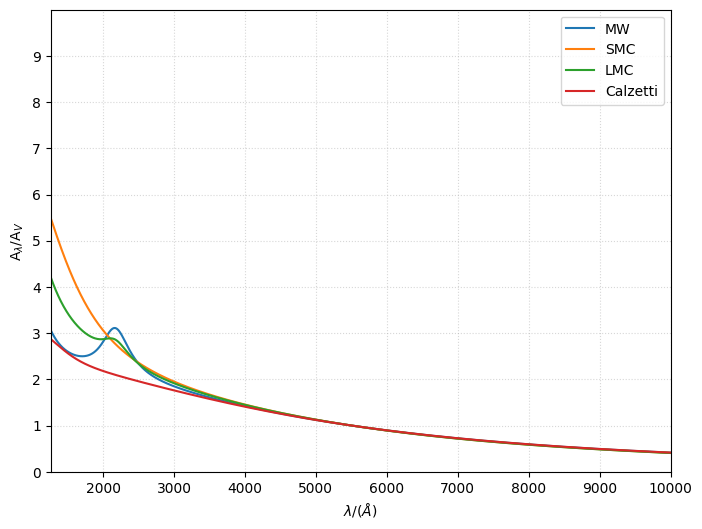

In [7]:
from synthesizer.emission_models.attenuation import ParametricLi08

mw_li08 = ParametricLi08(model="MW")
smc_li08 = ParametricLi08(model="SMC")
lmc_li08 = ParametricLi08(model="LMC")
calz_li08 = ParametricLi08(model="Calzetti")

fig, ax = mw_li08.plot_attenuation(lams, show=False, label="MW")
_, _ = smc_li08.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="SMC")
_, _ = lmc_li08.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="LMC")
_, _ = calz_li08.plot_attenuation(
    lams, fig=fig, ax=ax, show=False, label="Calzetti"
)
ax.grid(ls="dotted", alpha=0.5)

## Draine and Li Extinction curve from grain size distribution

The ``DraineLi_graincurves`` model gives the extinction curve for different grain species (Graphite, Silicate, PAH) based on the dust-to-gas ratio in small and large grains. Currently only two grain sizes are implemented for graphite and silicate, with one grain size (small grains) for PAHs. Default grids can be downloaded from the synthesizer grids box folder. The default grids have 0.01um and 0.1um as the small and large grain bin centres, following a lognormal or MRN grain size distribution. Custom grids can be made by running the script
in the grid-generation repo: ``grid-generation/src/synthesizer_grids/dust/create_dustextcurve_draine_li.py``

The model requires one to specify the dust-to-gas ratio in any of the components, e.g. ``dtg_graphite_small``, ``dtg_graphite_large``, ``dtg_silicate_small``, ``dtg_silicate_large``, ``dtg_pahion`` or ``dtg_pahneutral``.

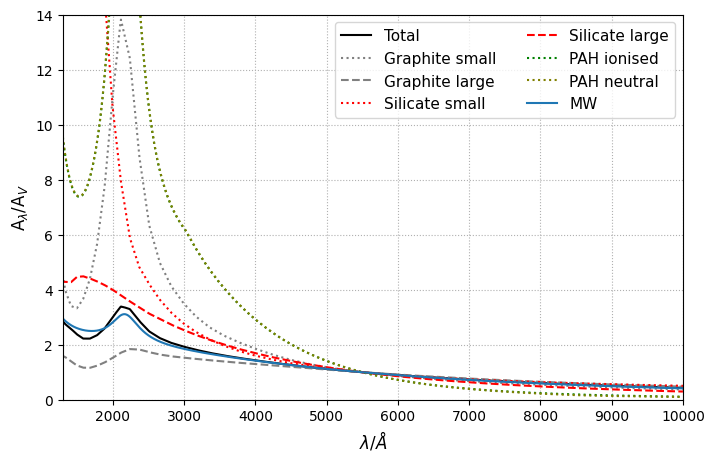

In [17]:
import matplotlib.pyplot as plt
from unyt import Msun, pc

from synthesizer import GRID_DIR
from synthesizer.emission_models.attenuation import DraineLiGrainCurves

dtg_graphite_small = 0.002
dtg_graphite_large = 0.006
dtg_silicate_small = 0.002
dtg_silicate_large = 0.006
dtg_pahion = 0.0001
dtg_pahneutral = 0.0001

# Arbitrary line-of-sight dust column density
dust_los = 1 * Msun/pc**2

grid_dir = GRID_DIR
grid_name = "dust_extcurve_draine_li_lognormal_asmall0p01_alarge0p1_apah0p005"

dl_extcurve = DraineLiGrainCurves(grid_name=grid_name, grid_dir=grid_dir)
ix = np.argmin(np.abs(lams - 5500 * Angstrom))
Alam_g_small = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_graphite_small=dtg_graphite_small,
)
Alam_g_large = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_graphite_large=dtg_graphite_large,
)
Alam_s_small = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_silicate_small=dtg_silicate_small,
)
Alam_s_large = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_silicate_large=dtg_silicate_large,
)
Alam_pahion = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_pahion=dtg_pahion,
)
Alam_pahnuetral = dl_extcurve.get_tau_at_lam(
    lams,
    dust_los,
    dtg_pahneutral=dtg_pahneutral,
)

Alam_tot = (
    Alam_g_small
    + Alam_g_large
    + Alam_s_small
    + Alam_s_large
    + Alam_pahion
    + Alam_pahnuetral
)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(lams, Alam_tot / Alam_tot[ix], color="black", label="Total")
ax.plot(
    lams,
    Alam_g_small / Alam_g_small[ix],
    color="grey",
    ls="dotted",
    label="Graphite small",
)
ax.plot(
    lams,
    Alam_g_large / Alam_g_large[ix],
    color="grey",
    ls="dashed",
    label="Graphite large",
)
ax.plot(
    lams,
    Alam_s_small / Alam_s_small[ix],
    color="red",
    ls="dotted",
    label="Silicate small",
)
ax.plot(
    lams,
    Alam_s_large / Alam_s_large[ix],
    color="red",
    ls="dashed",
    label="Silicate large",
)
ax.plot(
    lams,
    Alam_pahion / Alam_pahion[ix],
    color="green",
    ls="dotted",
    label="PAH ionised",
)
ax.plot(
    lams,
    Alam_pahnuetral / Alam_pahnuetral[ix],
    color="olive",
    ls="dotted",
    label="PAH neutral",
)

from synthesizer.emission_models.attenuation import ParametricLi08

MW_li08 = ParametricLi08(model="MW")
ax.plot(lams, MW_li08.get_tau(lam=lams), label='MW')

ax.set_xlim(1300, 10000)
ax.set_ylim(0,14)
ax.set_ylabel(r"A$_{\lambda}$/A$_{V}$", fontsize=12)
ax.set_xlabel(r"$\lambda$/$\AA$", fontsize=12)
ax.grid(ls="dotted")
ax.legend(ncols=2, fontsize=11)

plt.show()

## Varying Attenuation Law Parameters

The parameters of an attenuation law (e.g. the ``slope`` of a ``PowerLaw``) can be varied on-the-fly when calculating the attenuation or transmission curves. This allows us to instantiate a single attenuation law object, and then vary its parameters as needed, e.g. for generating a population of galaxies with different attenuation law slopes.

The way this works in practice is that we instantiate the attenuation law emission model as normal, but we override the parameters we want to vary with a string input, which will be the argument the code looks for on the emission model and emitter.

In [9]:
from synthesizer.emission_models.attenuation import ParametricLi08

dust_curve = ParametricLi08(
    model="MW",
    OPT_NIR_slope="optical_slope",
    UV_slope="uv_slp",
    FUV_slope=None,
    bump="bump_ampl",
)

This emission model is not useable on its own, but when attached to a parent EmissionModel or emitter with the appropriate parameters, the parameters will be overridden on-the-fly when calculating the attenuation or transmission curves.

In the below example, we instantiate a ``ParametricLi08`` attenuation law, but override the ``OPT_NIR_slope``, ``UV_slope``, and ``bump`` parameters with strings. When this attenuation law is attached to an emitter or emission model with these parameters, the values will be used instead of the defaults. If you set a parameter to ``None``, it will expect an override with the same name as the parameter (e.g. ``FUV_slope`` in this case).

/Users/ap629AA/Astro/synthesizer/synthesizer/src/synthesizer/components/stellar.py:75: RuntimeWarning: invalid value encountered in log10
  self.log10metallicities = np.log10(
/Users/ap629AA/Astro/synthesizer/synthesizer/src/synthesizer/particle/stars.py:1107: RuntimeWarning: invalid value encountered in log10
  np.log10(metallicities),


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\lambda/[\\mathrm{\\AA}]$', ylabel='$L_{\\nu}/[\\mathrm{\\rm{erg} \\ / \\ \\rm{Hz \\cdot \\rm{s}}}]$'>)

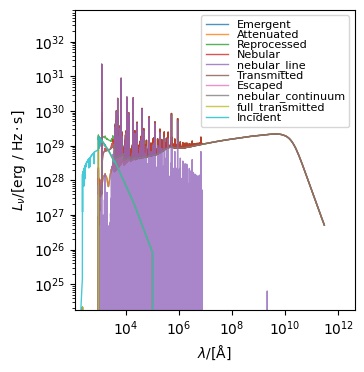

In [10]:
from unyt import Msun, yr

from synthesizer.emission_models import TotalEmission
from synthesizer.grid import Grid
from synthesizer.parametric import Stars

grid = Grid("test_grid.hdf5")

stars = Stars(
    log10ages=grid.log10ages,
    metallicities=grid.log10metallicity,
    sf_hist=1e6 * yr,
    metal_dist=0.02,
    initial_mass=1e8 * Msun,
    optical_slope=-0.7,
    uv_slp=3.0,
    tau_v=1.0,
)

emergent = TotalEmission(
    grid=grid, dust_curve=dust_curve, bump_ampl=10, FUV_slope=2.0
)

stars.get_spectra(emergent)

stars.plot_spectra()